# Predicting the Boston Housing using Linear Regression using stochastic gradient descent

In [1]:
#Importing all the necessary libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from seaborn import scatterplot as splot

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

# Boston Dataset Discription :-

Data Set Characteristics:

:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive

:Median Value (attribute 14) is usually the target

:Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

:Missing Attribute Values: None

:Creator: Harrison, D. and Rubinfeld, D.L.


# Column Standardisation of boston dataset

In [5]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
#Creating data frame for boston data
bostonDF = pd.DataFrame(data = X,columns = load_boston().feature_names)

bostonDF.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058


In [7]:
bostonDF['Target'] = Y

In [8]:
bostonDF.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4


# Custom SGD Regressor

In [61]:
def predict(row, coefficients):
    """Function to predict the target values of x_i.
    -----------------------------------------------------------------------------------
    Parameters:
    row :array-like or sparse matrix of shape = [n_samples, n_features]
             The training input samples. 
     coef : Weights assigned to the features
     inter : The intercept term
    
    
    """
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def SGD_Regressor(train, learning_rate, n_epoch):
    """Function designed to implement SGD 
     Parameters:
     --------------------------------------------------------------------------------------------------
    train :array-like or sparse matrix of shape = [n_samples, n_features]
             The training input samples. 
    
      
    learning_rate : The learning rate.
    
    n_epoch : Number of iterations.
    
    
    
    """
    coef = [0.0 for i in range(len(train.values[0]))]
    for epoch in range(n_epoch):
        train1 = np.array(train.sample(200))
        for row in train1:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            error *= (2 / 506)
            coef[0] = coef[0] - learning_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - learning_rate * error * row[i]
        
    return coef

def predictions(x,weights):
    """Function to predict the values of x
    ---------------------------------------------------------------------------------------------
    Parameters:
    x = array -like or sparse matrix of shapes = [n_samples]
    weights = weights assigned to each features and the intercept term
    
    
    """
    predictions = []
    for row in x.values:
        p = predict(row,coef)
        predictions.append(p)
    return predictions

def plotFigure(actual,predicted):
    """Function to plot """
    plt.figure(figsize=(10,10))
    splot(actual,predicted)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Plot of Actual v/s Predicted")

table = PrettyTable()
table.field_names = ['Classifier','Mean Squared Error']
table2 = PrettyTable()
table2.field_names = ['Number of iteration','Mean Squared Error','Absolute Difference in Weights','Absolute Difference in Intercept']

# Custom SGD Regressor with learning rate 0.001 and number of iteration 100.

Weights assigned to the features :

[-0.21980763090670577, 0.2113055319115329, -0.26743540459145093, 0.12267737177736644, -0.23860612574834245, 0.42554381962560633, -0.20269984065216792, 0.11929748729520924, -0.20977337645615432, -0.2661092995753618, -0.3012493130442708, 0.19390080485047295, -0.4511483519743374] 

The intercept term is : 1.7088883897145397 

The mean square error is = 493.9571652079282


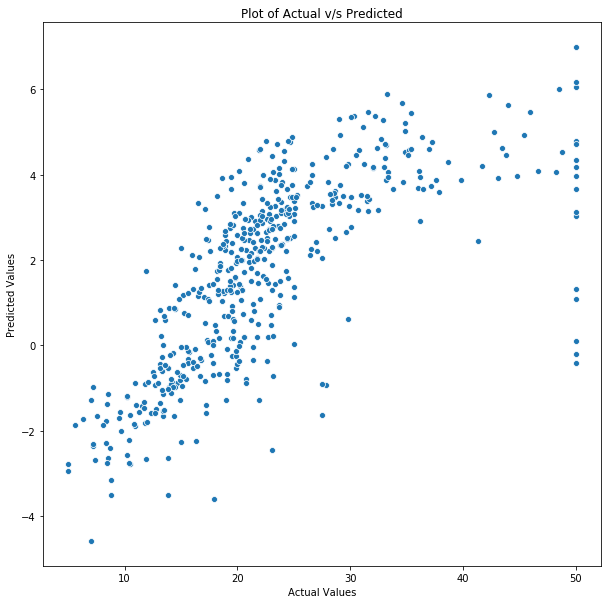

In [55]:
coef= SGD_Regressor(bostonDF,0.001,100)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)


#Program to plot predicated and actual values.
plotFigure(Y,y_predict)

<b> Observation</b> <br>
The predicated values and actual values are scattered in the plot, this suggest that there are errors. For zero error, the plot should be linear.

# SGD Regressor using Sklearn library

Weights assigned to the features :

[-0.63216773  0.52400658 -0.33409208  0.78901903 -1.02686411  3.0806866
 -0.01934271 -2.01860648  0.96648566 -0.4323743  -1.86966726  0.8440241
 -3.51235582] 

The intercept term is : 22.363834226127487 

Mean Sqaure Error is : 22.816196548905626 



Text(0.5,1,'Plot of Actual v/s Predicted')

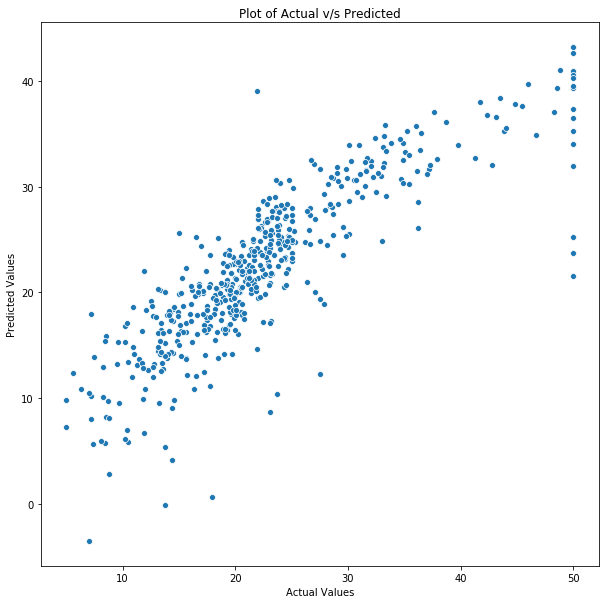

In [54]:
#Program to implement SGD Regressor using sklearn.
clf = SGDRegressor()
clf.fit(X, Y)
predicted = clf.predict(X)

print("Weights assigned to the features :\n")
print(clf.coef_,'\n')
print("The intercept term is : %r"%np.asscalar(clf.intercept_),'\n')


#Calculating the mean sqaure error.
print("Mean Sqaure Error is :",mean_squared_error(Y, clf.predict(X)),'\n')


plt.figure(figsize=(10,10))
splot(Y,predicted )
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Plot of Actual v/s Predicted")

<b> Observation </b><br> From the plot it is clear that the error between predicated values and actual value is small.

In [59]:
print("The absolute weight difference between Manual SGD and Sklearn SGD :" ,abs(coef[1:] - clf.coef_).sum())
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,np.asscalar(abs(coef[0] - clf.intercept_)))


The absolute weight difference between Manual SGD and Sklearn SGD : 13.844994083552455
The absolute intercept difference between Manual SGD and Sklearn SGD : 20.65494583641295


In [78]:
print('='*100)
table.add_row(['CustomSGD',493.95])
table.add_row(['Sklearn SGD', 22.81])

print(table)
print('='*100)

+-------------+--------------------+
|  Classifier | Mean Squared Error |
+-------------+--------------------+
|  CustomSGD  |       493.95       |
| Sklearn SGD |       22.81        |
+-------------+--------------------+


# <b> Custom SGD regressor using Different iteration values to match the Sklearns SGD with learning rate kept as 0.001

Number of iteration = 50 and learning rate = 0.001

Weights assigned to the features :

[-0.12361362280089393, 0.11849819235118568, -0.15487006325241234, 0.068509953934353, -0.13467146272949426, 0.2459485705517341, -0.10926545141616426, 0.0749062529646776, -0.11776877191323291, -0.1491739545439613, -0.1642210096341264, 0.10591566123068104, -0.25054349700637163] 

The intercept term is : 0.8750027447047155 

Few of the predicted values 
 [2.0571851655832982, 1.5604679718642245, 2.07206580726595, 2.2044235554663465, 2.142166101119998, 1.874999403561822, 1.445329186881058, 1.1653521650018286, 0.5738466045901873, 1.2287598190615971, 1.2063868776043583, 1.3762552389688436, 1.3843752068195294, 1.0424299025277737, 0.9070305652608268, 1.0064620807981666, 1.197594101175386, 0.7243386470409208, 0.6868990691523309, 0.7879324708097531] 

The mean square error is = 538.7450180441862
The absolute weight difference between Manual SGD and Sklearn SGD : 14.796981521413231 

The absolute intercept difference between Manual SGD and Sklearn SGD : 21.488831

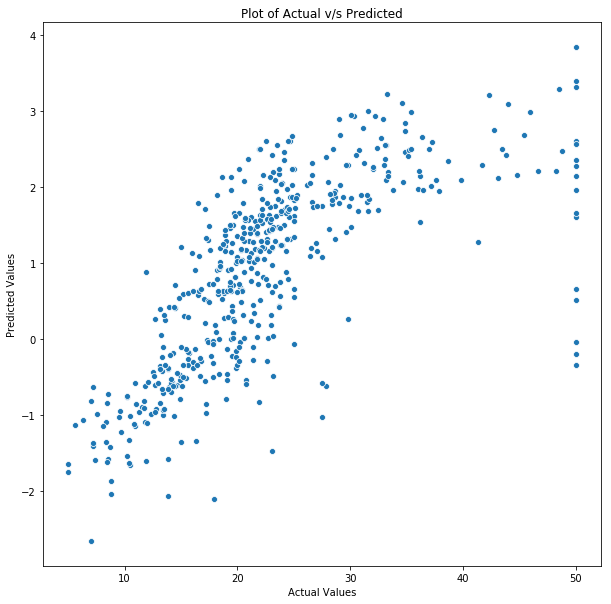

In [82]:
coef= SGD_Regressor(bostonDF,0.001,50)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)
print('Few of the predicted values \n',y_predict[0:20],'\n')

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)

diff_weights = abs(coef[1:] - clf.coef_).sum()
diff_intercept = np.asscalar(abs(coef[0] - clf.intercept_))
print("The absolute weight difference between Manual SGD and Sklearn SGD :", diff_weights,'\n' )
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,diff_intercept, '\n')

table2.add_row([50,mean_square_error,diff_weights,diff_intercept])

#Program to plot predicated and actual values.
plotFigure(Y,y_predict)



Number of iteration = 200 and learning rate = 0.001

Weights assigned to the features :

[-0.3771360858196914, 0.33417907992078344, -0.4373446115795671, 0.22393090185883707, -0.3714436557716355, 0.8360692908198736, -0.31993623945293026, 0.1356599109173394, -0.3222853739932573, -0.4333979368313032, -0.5580162553906791, 0.3327961858680918, -0.8051482941174798] 

The intercept term is : 3.301645160643665 

Few of the predicted values 
 [6.946782299504165, 5.310038989340887, 6.984430217967343, 7.265311815963647, 7.084156068776968, 6.184050543056641, 4.956161227286648, 4.080115592862007, 2.1427999468144696, 4.230494393908565, 4.204095938864813, 4.718763088809284, 4.7275613713173055, 3.64180773622374, 3.2551278657340728, 3.523389441526947, 4.115735083509959, 2.6679933146813317, 2.494088002262617, 2.864262470220643] 

The mean square error is = 417.78123498386674
The absolute weight difference between Manual SGD and Sklearn SGD : 12.287978595430012 

The absolute intercept difference between Manual SGD and Sklearn SGD : 19.06218906548382 



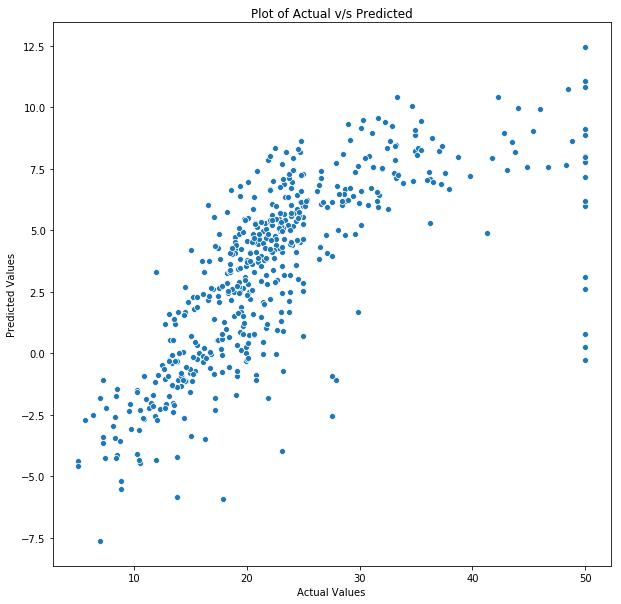

In [83]:
coef= SGD_Regressor(bostonDF,0.001,200)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)
print('Few of the predicted values \n',y_predict[0:20],'\n')

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)

diff_weights = abs(coef[1:] - clf.coef_).sum()
diff_intercept = np.asscalar(abs(coef[0] - clf.intercept_))
print("The absolute weight difference between Manual SGD and Sklearn SGD :", diff_weights,'\n' )
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,diff_intercept, '\n')

table2.add_row([200,mean_square_error,diff_weights,diff_intercept])

#Program to plot predicated and actual values.
plotFigure(Y,y_predict)



Number of iteration = 500 and learning rate = 0.001

Weights assigned to the features :

[-0.5238450280621146, 0.4857420599888314, -0.598579075714741, 0.4881987969380249, -0.48177513043223213, 1.5885438823041806, -0.38988648237337903, -0.02592642207452255, -0.33252733807050805, -0.5585639528066274, -0.9897065405041207, 0.4945071930915689, -1.4390338744559186] 

The intercept term is : 7.358228322525138 

Few of the predicted values 
 [13.03311052302015, 10.136496211915635, 13.12101593502698, 13.214902879650735, 12.963620486225576, 11.290086051661333, 9.507700714691445, 8.104085305461803, 4.58980186003129, 8.214102058884208, 8.297225696655854, 9.102537128987782, 8.923737474390965, 7.312332057516151, 6.837861286427933, 7.078972968211121, 7.992354072769022, 5.77731663913154, 5.269714675092138, 6.067092848639406] 

The mean square error is = 265.99218100467976
The absolute weight difference between Manual SGD and Sklearn SGD : 9.840352193336425 

The absolute intercept difference between Manual SGD and Sklearn SGD : 15.00560590360235 



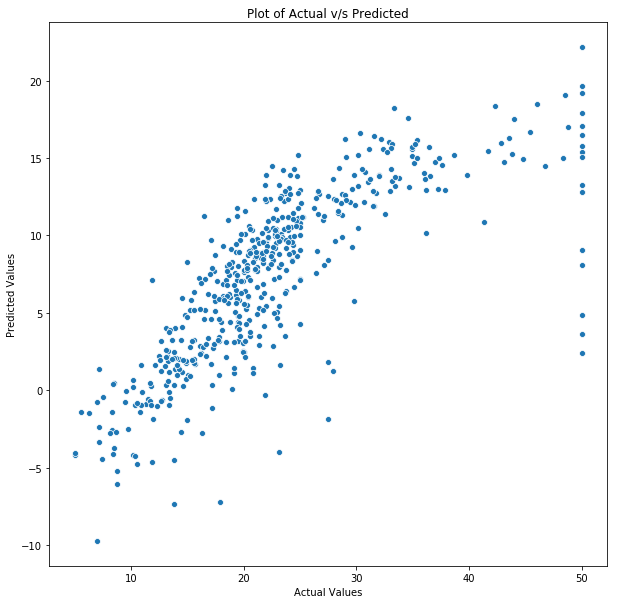

In [84]:
coef= SGD_Regressor(bostonDF,0.001,500)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)
print('Few of the predicted values \n',y_predict[0:20],'\n')

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)

diff_weights = abs(coef[1:] - clf.coef_).sum()
diff_intercept = np.asscalar(abs(coef[0] - clf.intercept_))
print("The absolute weight difference between Manual SGD and Sklearn SGD :", diff_weights,'\n' )
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,diff_intercept, '\n')

table2.add_row([500,mean_square_error,diff_weights,diff_intercept])

#Program to plot predicated and actual values.
plotFigure(Y,y_predict)



Number of iteration = 2000 and learning rate = 0.001

Weights assigned to the features :

[-0.6041584623163376, 0.4491218780533855, -0.5219455528380709, 0.8394282056964796, -0.46692462857132444, 2.991335057805172, -0.18005772985926646, -1.1105927812727905, 0.21662897567775255, -0.4374063293025355, -1.6117335028279818, 0.7607273704428857, -2.6836058695791056] 

The intercept term is : 17.896187074062677 

Few of the predicted values 
 [25.54386773210466, 20.641458854462265, 25.899606654926153, 24.87013215718969, 24.56863619608059, 21.50894209389126, 19.202370914522888, 16.968464800426286, 10.422998404542287, 16.663458723105414, 17.11324996510078, 18.426310962256785, 17.636008207901902, 16.301679863830515, 16.018741947800734, 15.86630924448872, 17.07871926056037, 14.079574775315873, 12.640512695743118, 14.594832024831057] 

The mean square error is = 46.151859074914604
The absolute weight difference between Manual SGD and Sklearn SGD : 3.9840455091129354 

The absolute intercept difference between Manual SGD and Sklearn SGD : 4.467647152064

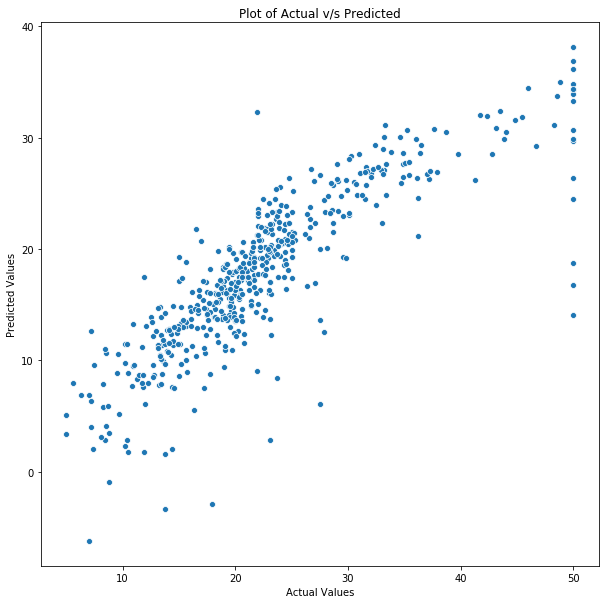

In [85]:
coef= SGD_Regressor(bostonDF,0.001,2000)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)
print('Few of the predicted values \n',y_predict[0:20],'\n')

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)

diff_weights = abs(coef[1:] - clf.coef_).sum()
diff_intercept = np.asscalar(abs(coef[0] - clf.intercept_))
print("The absolute weight difference between Manual SGD and Sklearn SGD :", diff_weights,'\n' )
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,diff_intercept, '\n')

table2.add_row([2000,mean_square_error,diff_weights,diff_intercept])

#Program to plot predicated and actual values.
plotFigure(Y,y_predict)



Number of iteration = 5000 and learning rate = 0.001

Weights assigned to the features :

[-0.663374563628594, 0.537146694398676, -0.4163247198031464, 0.8142062300513117, -0.8702948303864496, 3.2233585733367, -0.1620087909177337, -1.9453168688046971, 0.7759950103724232, -0.4699461991735613, -1.8001221320222671, 0.8892340771172832, -3.345476297341108] 

The intercept term is : 22.099988658097264 

Few of the predicted values 
 [30.218736024699773, 24.64284445600789, 30.61046656897526, 29.131193953840437, 28.6655508620076, 25.379223911509953, 22.791673843043817, 19.85282096185236, 12.063743944935117, 19.406806186699757, 19.779666510589948, 21.684432553533632, 20.898896065750517, 19.929948985327165, 19.598232613265026, 19.514784545308842, 20.903174828978905, 17.30250589298099, 15.979670065213858, 18.22691534713375] 

The mean square error is = 23.10436763162024
The absolute weight difference between Manual SGD and Sklearn SGD : 1.176660904464986 

The absolute intercept difference between Manual SGD and Sklearn SGD : 0.26384556803022363 



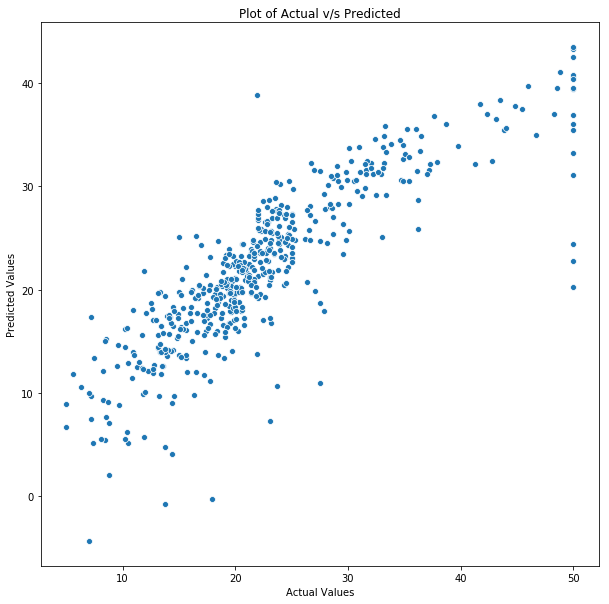

In [89]:
coef= SGD_Regressor(bostonDF,0.001,5000)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)
print('Few of the predicted values \n',y_predict[0:20],'\n')

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)

diff_weights = abs(coef[1:] - clf.coef_).sum()
diff_intercept = np.asscalar(abs(coef[0] - clf.intercept_))
print("The absolute weight difference between Manual SGD and Sklearn SGD :", diff_weights,'\n' )
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,diff_intercept, '\n')

table2.add_row([5000,mean_square_error,diff_weights,diff_intercept])

#Program to plot predicated and actual values.
plotFigure(Y,y_predict)



Number of iteration = 7000 and learning rate = 0.001

Weights assigned to the features :

[-0.6993089491968673, 0.6111773337142742, -0.37454624916713714, 0.7674591520103269, -1.1237179471411718, 3.112582107891265, -0.1618912915910622, -2.248645340436907, 1.0021151170311349, -0.5747935465878695, -1.867531305402308, 0.8942565188105335, -3.4815809122200587] 

The intercept term is : 22.433771695442516 

Few of the predicted values 
 [30.590409875375606, 24.93753271400451, 30.8817730662349, 29.29958644575597, 28.764837954205554, 25.593986013986, 23.042442987440943, 19.893857267327853, 11.964692146761509, 19.420241958607367, 19.705834255425767, 21.823605680339472, 21.12188451012731, 20.118006437610966, 19.759478937725362, 19.747023895206173, 21.15315217848096, 17.42550842849265, 16.304682457744654, 18.52305479513813] 

The mean square error is = 22.589347277638062
The absolute weight difference between Manual SGD and Sklearn SGD : 0.9788547899021303 

The absolute intercept difference between Manual SGD and Sklearn SGD : 0.06993746931502898 



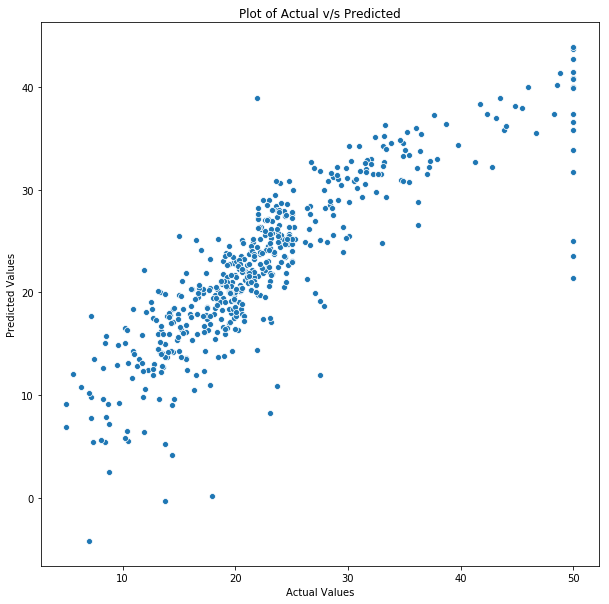

In [90]:
coef= SGD_Regressor(bostonDF,0.001,7000)


print("Weights assigned to the features :\n")
print(coef[1:],'\n')
print("The intercept term is : %r"%coef[0],'\n')


#Program to predict the values
y_predict = predictions(bostonDF,coef)
print('Few of the predicted values \n',y_predict[0:20],'\n')

#Program to calculate the mean sqaure error.
mean_square_error = mean_squared_error(Y,y_predict)
print("The mean square error is = %r" %mean_square_error)

diff_weights = abs(coef[1:] - clf.coef_).sum()
diff_intercept = np.asscalar(abs(coef[0] - clf.intercept_))
print("The absolute weight difference between Manual SGD and Sklearn SGD :", diff_weights,'\n' )
print("The absolute intercept difference between Manual SGD and Sklearn SGD :" ,diff_intercept, '\n')

table2.add_row([7000,mean_square_error,diff_weights,diff_intercept])

#Program to plot predicated and actual values.
plotFigure(Y,y_predict)



In [95]:
print(table2)

+---------------------+--------------------+--------------------------------+----------------------------------+
| Number of iteration | Mean Squared Error | Absolute Difference in Weights | Absolute Difference in Intercept |
+---------------------+--------------------+--------------------------------+----------------------------------+
|          50         | 538.7450180441862  |       14.796981521413231       |        21.48883148142277         |
|         200         | 417.78123498386674 |       12.287978595430012       |        19.06218906548382         |
|         500         | 265.99218100467976 |       9.840352193336425        |        15.00560590360235         |
|         2000        | 46.151859074914604 |       3.9840455091129354       |         4.46764715206481         |
|         5000        | 23.10436763162024  |       1.176660904464986        |       0.26384556803022363        |
|         7000        | 22.589347277638062 |       0.9788547899021303       |       0.0699374693

# Conclusion: <br>

By keeping the learning rate as 0.001 and with 7000 iteration, custom SGD performed better as compared to sklearns SGD. With 0.001 as learning rate and 7000 iteration, we obtained an mean sqaure error as 22.58.

Also from the above table, we can note that, as the iteration increased, mean sqaure error reduced. We can still reduce the mean sqaure error for our custom made SGD by including regularization terms.